The experiments were run with the following command:
```sh
dvc exp run --queue \
    -S qa.model='llama-3-70b-tgi,gpt-4o,gpt-3.5-turbo' \
    -S qa.prompt='standard,cot-zs,cot-fs,cte' \
    -S run='1'
```

In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellek.dvc.experiment import load_experiments

experiments = load_experiments('ablation-llm-mini-subset.json')
print(f"{len(experiments)} experiments")
experiments[0]

13 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/musique-mini',
   'name': 'answerable',
   'split': 'validation'},
  'qa': {'prompt': 'standard', 'model': 'llama-3-70b-tgi', 'temperature': 0.1},
  'run': 1},
 'metrics': {'exact_match': 0.5, 'f1': 0.6599999999999999, 'fuzzy_match': 0.7}}

In [3]:
df = (
    pd.json_normalize(experiments)
    .sort_values(["params.qa.model", "params.qa.prompt", "params.qa.temperature", "params.run"])
    .drop(columns=["commit", "id"])
    .drop_duplicates()
    .reset_index(drop=True)
)
mask = df["params.dataset.path"] == "bdsaglam/musique-mini"
df = df.loc[mask].copy()
df

,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,dizzy-scut,bdsaglam/musique-mini,answerable,validation,cot-fs,gpt-3.5-turbo,0.1,1,0.546667,0.638557,0.590000
1,jowly-cole,bdsaglam/musique-mini,answerable,validation,cot-zs,gpt-3.5-turbo,0.1,1,0.500000,0.610249,0.570000
2,naggy-rins,bdsaglam/musique-mini,answerable,validation,cte,gpt-3.5-turbo,0.1,1,0.503333,0.601358,0.523333
3,awing-lama,bdsaglam/musique-mini,answerable,validation,standard,gpt-3.5-turbo,0.1,1,0.323333,0.385183,0.350000
4,adunc-tiff,bdsaglam/musique-mini,answerable,validation,cot-fs,gpt-4o,0.1,1,0.566667,0.653583,0.600000
5,waney-lift,bdsaglam/musique-mini,answerable,validation,cot-zs,gpt-4o,0.1,1,0.540000,0.640940,0.593333
6,stray-plop,bdsaglam/musique-mini,answerable,validation,cte,gpt-4o,0.1,1,0.646667,0.740482,0.690000
7,risky-guns,bdsaglam/musique-mini,answerable,validation,standard,gpt-4o,0.1,1,0.570000,0.671835,0.613333
8,blear-mina,bdsaglam/musique-mini,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.316667,0.365883,0.356667
9,grave-shoe,bdsaglam/musique-mini,answerable,validation,cot-zs,llama-3-70b-tgi,0.1,1,0.280000,0.335338,0.336667


In [4]:
metric_cols = [col for col in df.columns if col.startswith("metrics.")]

In [5]:
df.drop(
    columns=["name", "params.dataset.path", "params.dataset.name", "params.dataset.split"]
).groupby(["params.qa.model", "params.qa.prompt", "params.qa.temperature"]).aggregate(["mean", "max", "count"]).loc[:, metric_cols]

metrics.exact_match  \
                                                                      mean   
params.qa.model params.qa.prompt params.qa.temperature                       
gpt-3.5-turbo   cot-fs           0.1                              0.546667   
                cot-zs           0.1                              0.500000   
                cte              0.1                              0.503333   
                standard         0.1                              0.323333   
gpt-4o          cot-fs           0.1                              0.566667   
                cot-zs           0.1                              0.540000   
                cte              0.1                              0.646667   
                standard         0.1                              0.570000   
llama-3-70b-tgi cot-fs           0.1                              0.316667   
                cot-zs           0.1                              0.280000   
                cte              0.1                              0.640000   
                standard         0.1                              0.506667   

                                                                        \
                                                             max count   
params.qa.model params.qa.prompt params.qa.temperature                   
gpt-3.5-turbo   cot-fs           0.1                    0.546667     1   
                cot-zs           0.1                    0.500000     1   
                cte              0.1                    0.503333     1   
                standard         0.1                    0.323333     1   
gpt-4o          cot-fs           0.1                    0.566667     1   
                cot-zs           0.1                    0.540000     1   
                cte              0.1                    0.646667     1   
                standard         0.1                    0.570000     1   
llama-3-70b-tgi cot-fs           0.1                    0.316667     1   
                cot-zs           0.1                    0.280000     1   
                cte              0.1                    0.640000     1   
                standard         0.1                    0.513333     2   

                                                       metrics.f1            \
                                                             mean       max   
params.qa.model params.qa.prompt params.qa.temperature                        
gpt-3.5-turbo   cot-fs           0.1                     0.638557  0.638557   
                cot-zs           0.1                     0.610249  0.610249   
                cte              0.1                     0.601358  0.601358   
                standard         0.1                     0.385183  0.385183   
gpt-4o          cot-fs           0.1                     0.653583  0.653583   
                cot-zs           0.1                     0.640940  0.640940   
                cte              0.1                     0.740482  0.740482   
                standard         0.1                     0.671835  0.671835   
llama-3-70b-tgi cot-fs           0.1                     0.365883  0.365883   
                cot-zs           0.1                     0.335338  0.335338   
                cte              0.1                     0.742190  0.742190   
                standard         0.1                     0.636081  0.660000   

                                                              \
                                                       count   
params.qa.model params.qa.prompt params.qa.temperature         
gpt-3.5-turbo   cot-fs           0.1                       1   
                cot-zs           0.1                       1   
                cte              0.1                       1   
                standard         0.1                       1   
gpt-4o          cot-fs           0.1                       1   
                cot-zs           0.1                       1   
           

In [6]:
# Average metrics over repeated runs (params.run)
df_avg = (
    df.groupby(["params.qa.model", "params.qa.prompt", "params.qa.temperature"])[
        ["metrics.exact_match", "metrics.f1", "metrics.fuzzy_match"]
    ]
    .mean()
    .reset_index()
)
df_avg

,params.qa.model,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,gpt-3.5-turbo,cot-fs,0.1,0.546667,0.638557,0.590000
1,gpt-3.5-turbo,cot-zs,0.1,0.500000,0.610249,0.570000
2,gpt-3.5-turbo,cte,0.1,0.503333,0.601358,0.523333
3,gpt-3.5-turbo,standard,0.1,0.323333,0.385183,0.350000
4,gpt-4o,cot-fs,0.1,0.566667,0.653583,0.600000
5,gpt-4o,cot-zs,0.1,0.540000,0.640940,0.593333
6,gpt-4o,cte,0.1,0.646667,0.740482,0.690000
7,gpt-4o,standard,0.1,0.570000,0.671835,0.613333
8,llama-3-70b-tgi,cot-fs,0.1,0.316667,0.365883,0.356667
9,llama-3-70b-tgi,cot-zs,0.1,0.280000,0.335338,0.336667


In [7]:
prompt_order = ['standard', 'cot-zs', 'cot-fs', 'cte']
df_avg['params.qa.prompt'] = pd.Categorical(df_avg['params.qa.prompt'], categories=prompt_order, ordered=True)
df_avg = df_avg.sort_values('params.qa.prompt')
df_avg

,params.qa.model,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
3,gpt-3.5-turbo,standard,0.1,0.323333,0.385183,0.350000
7,gpt-4o,standard,0.1,0.570000,0.671835,0.613333
11,llama-3-70b-tgi,standard,0.1,0.506667,0.636081,0.640000
1,gpt-3.5-turbo,cot-zs,0.1,0.500000,0.610249,0.570000
5,gpt-4o,cot-zs,0.1,0.540000,0.640940,0.593333
9,llama-3-70b-tgi,cot-zs,0.1,0.280000,0.335338,0.336667
0,gpt-3.5-turbo,cot-fs,0.1,0.546667,0.638557,0.590000
4,gpt-4o,cot-fs,0.1,0.566667,0.653583,0.600000
8,llama-3-70b-tgi,cot-fs,0.1,0.316667,0.365883,0.356667
2,gpt-3.5-turbo,cte,0.1,0.503333,0.601358,0.523333


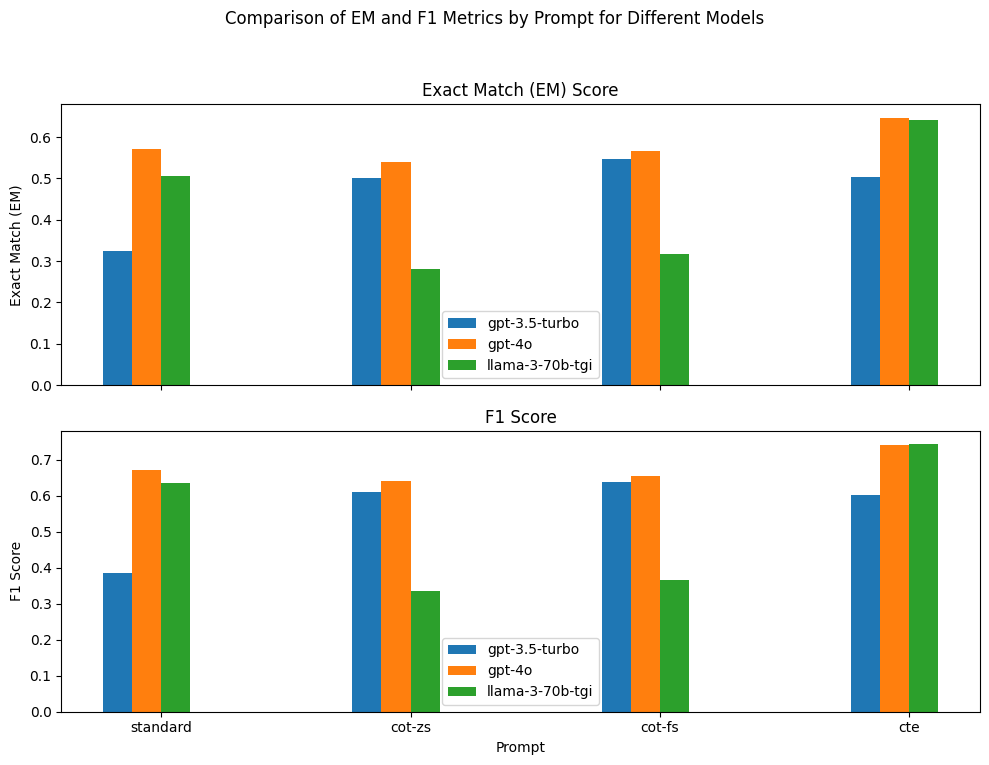

In [8]:
# Get unique models and prompts
models = df_avg['params.qa.model'].unique()
prompts = df_avg['params.qa.prompt'].unique()

# Set up the figure and axes
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
fig.suptitle('Comparison of EM and F1 Metrics by Prompt for Different Models')

x = np.arange(len(prompts))
width = 0.35 / len(models)  # Adjust width based on the number of models

# Plot EM and F1 scores for each model
for i, model in enumerate(models):
    model_df = df_avg[df_avg['params.qa.model'] == model]
    ax[0].bar(x + (i - len(models) / 2) * width, model_df['metrics.exact_match'], width, label=model)
    ax[1].bar(x + (i - len(models) / 2) * width, model_df['metrics.f1'], width, label=model)

# Set labels and titles for EM scores plot
ax[0].set_ylabel('Exact Match (EM)')
ax[0].set_title('Exact Match (EM) Score')
ax[0].set_xticks(x)
ax[0].set_xticklabels(prompts)
ax[0].legend(loc='best')

# Set labels and titles for F1 scores plot
ax[1].set_xlabel('Prompt')
ax[1].set_ylabel('F1 Score')
ax[1].set_title('F1 Score')
ax[1].set_xticks(x)
ax[1].set_xticklabels(prompts)
ax[1].legend(loc='best')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()